In [3]:
# Common Imports
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
# k-means clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# read from csv
exampleData = pd.read_csv(
    filepath_or_buffer="./data/IRIS.csv",
    delimiter=",")

### K-Means Clustering:

In [6]:
kmc = KMeans(n_clusters=3, max_iter=300)
x = exampleData.iloc[:,:-1] # define columns - all but last
kmc_model = kmc.fit(x)

### Plot Clusters:

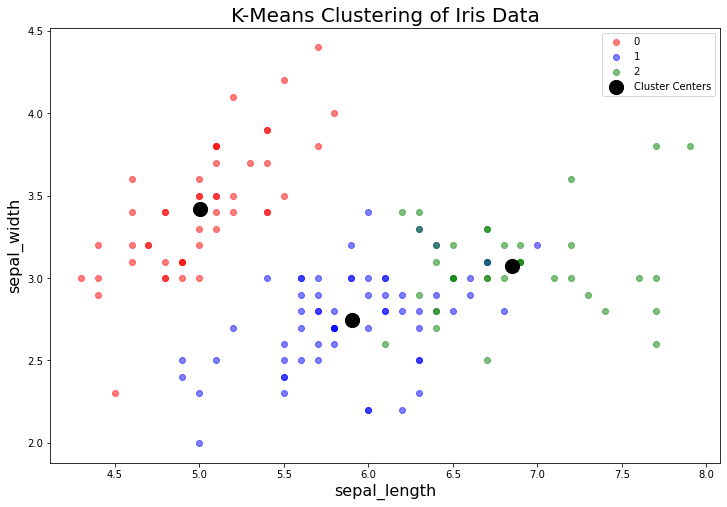

In [7]:
# define colors
colors=["red","blue","green","purple","orange"]
dim_1 = 0    # change, between 0 and 3
dim_2 = 1    # between 0 and 3, dim_2!=dim_1

# plotting with different coloured clusters and showing cluster centres
plt.figure(figsize=(12,8))
for i in range(np.max(kmc_model.labels_)+1):
    plt.scatter(exampleData[kmc_model.labels_==i].iloc[:,dim_1], exampleData[kmc_model.labels_==i].iloc[:,dim_2], label=i, c=colors[i], alpha=0.5)
plt.scatter(kmc_model.cluster_centers_[:,dim_1], kmc_model.cluster_centers_[:,dim_2], label='Cluster Centers', c="black", s=200)
plt.title("K-Means Clustering of Iris Data",size=20)
plt.xlabel(exampleData.columns[dim_1], size=16)
plt.ylabel(exampleData.columns[dim_2], size=16)
plt.legend()
plt.show()

### Score Accuracy:

In [8]:
for i in range(np.max(kmc_model.labels_)+1):
    unique, counts = np.unique(exampleData[kmc_model.labels_==i]["species"], return_counts=True)
    print(np.asarray((unique, counts)), "\n")

[['Iris-setosa']
 [50]] 

[['Iris-versicolor' 'Iris-virginica']
 [48 14]] 

[['Iris-versicolor' 'Iris-virginica']
 [2 36]] 



### 2 Dimensional Representation:

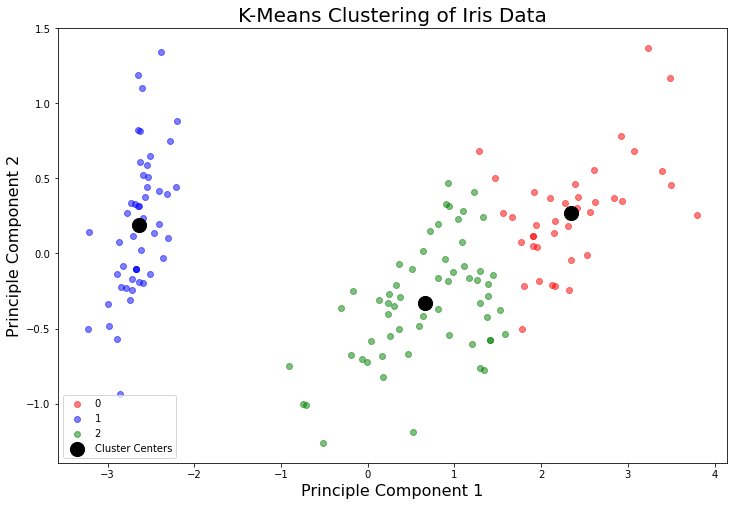

In [9]:
# decompose data
pca = PCA(n_components=2)
reduced = pca.fit_transform(exampleData.iloc[:,:-1])

# re-cluster
kmc = KMeans(n_clusters=3)
kmc_model = kmc.fit(reduced)

# define colors
colors=["red","blue","green","purple","orange"]

# draw plot
plt.figure(figsize=(12,8))
for i in range(np.max(kmc_model.labels_)+1):
    plt.scatter(reduced[kmc_model.labels_==i][:,0], reduced[kmc_model.labels_==i][:,1], label=i, c=colors[i], alpha=0.5)
plt.scatter(kmc_model.cluster_centers_[:,0], kmc_model.cluster_centers_[:,1], label='Cluster Centers', c="black", s=200)
plt.title("K-Means Clustering of Iris Data",size=20)
plt.xlabel("Principle Component 1", size=16)
plt.ylabel("Principle Component 2", size=16)
plt.legend()
plt.show()

### Cluster Stats:

In [12]:
# split data
k = np.max(kmc_model.labels_)+1
df_clusters = [exampleData[kmc_model.labels_==i] for i in range(k)]
columns = ["sepal_length","sepal_width","petal_length","petal_width"]

# create data frame
cluster_stats = { 
    'Cluster' : list(range(k)),
    'Size' :    [len(df_clusters[i]) for i in range(k)]
}
cluster_stats = pd.DataFrame(cluster_stats)
for c in columns: # add statistics
    cluster_stats[f"Mean {c}:"] = pd.DataFrame([round(df_clusters[i][c].mean(), 2) for i in range(k)])
    cluster_stats[f"Std Dev {c}:"] = pd.DataFrame([round(df_clusters[i][c].std(), 2) for i in range(k)])
    
df_cluster_stats

,Cluster,Size,Mean sepal_length:,Std Dev sepal_length:,Mean sepal_width:,Std Dev sepal_width:,Mean petal_length:,Std Dev petal_length:,Mean petal_width:,Std Dev petal_width:
0,0,39,6.85,0.49,3.08,0.29,5.72,0.51,2.05,0.30
1,1,50,5.01,0.35,3.42,0.38,1.46,0.17,0.24,0.11
2,2,61,5.88,0.45,2.74,0.29,4.39,0.51,1.43,0.30
